# ITU Informatics Institute BLU603E Final Exam - Take Home Section
## Part - 1

For this take home assignment, a linear classifier will be designed to separate a dataset into two classes. Let's first examine the dataset by looking at the dataset. There are two classes denoted as $\omega_0$ and $\omega_1$ and there are 100 data points for each.



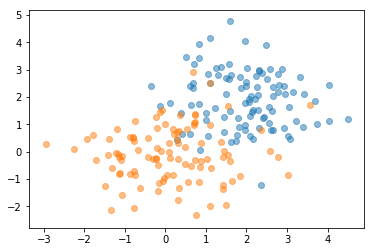

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#################################################
# PREPROCESS PART
#################################################

c1_np = np.zeros((100, 2), dtype=np.float32)
c2_np = np.zeros((100, 2), dtype=np.float32)

with open("C1_pts.txt", 'r') as f:
    c1_items = f.read().split("\n")[4:]
    for d, item in enumerate(c1_items):
        c1_np[d, :] = item.split()
        
with open("C2_pts.txt", 'r') as f:
    c2_items = f.read().split("\n")[4:]
    for d, item in enumerate(c2_items):
        c2_np[d, :] = item.split()

c1_c2_np = np.vstack((c1_np, c2_np))
gt = np.concatenate((np.zeros(100, dtype=np.int8), np.ones(100, dtype=np.int8)))

plt.scatter(c1_np[:, 0], c1_np[:, 1], alpha=0.5)
plt.scatter(c2_np[:, 0], c2_np[:, 1], alpha=0.5)
plt.show()

The data is noisy, but with a slight error, it can still be separable with a straight line. First, we would like to see if we can construct the line by fitting two 2-D Gaussians on this dataset. In this case, we need to estimate the mean and variance parameters for each Gaussian, and we are eager to see if covariances are close to each other for every axis. We will be using Maximum Likelihood for estimations. 

In [2]:
mean_c1 = np.mean(c1_np, axis=0)
mean_c2 = np.mean(c2_np, axis=0)

print("Mean vector of class 0 is: {}".format(mean_c1))
print("Mean vector of class 1 is: {}".format(mean_c2))

print("")

cov_c1 = np.cov(c1_np.T)
cov_c2 = np.cov(c2_np.T)

print("Covariance matrix of class 0 is: \n{}".format(cov_c1))
print("Covariance matrix of class 1 is: \n{}".format(cov_c2))

est_cov = np.round((cov_c1+cov_c2)/2, decimals=2)

Mean vector of class 0 is: [1.9626492 1.9038787]
Mean vector of class 1 is: [ 0.12308503 -0.07268096]

Covariance matrix of class 0 is: 
[[ 0.93394097 -0.11066026]
 [-0.11066026  1.07921646]]
Covariance matrix of class 1 is: 
[[1.35117639 0.08811922]
 [0.08811922 1.0101348 ]]


The results above state that mean of the first and second classes are located at $(1.963, 1.904)$ and $(0.1231, -0.0727)$. However, there is a gap between the estimated covariance matrices that, we cannot create a linear decision line by fitting these datapoints two Gaussians. If we set our estimated covariance matrix for two classes to be,
$$
\Sigma_{est} = \left(\begin{array}{cc} 
1.14 & -0.01\\
-0.01 & 1.04
\end{array}\right)
$$

which is the rounded average of two covariance matrices $\Sigma_1$ and $\Sigma_2$, the class likelihood function $P( x | \omega_i)$ is going to be 

$$
P(x | \omega_i) = \frac{1}{2 \pi |\Sigma_{est}|^{1/2}}e^{-\frac{1}{2}(x - \mu_i)^T\Sigma_{est}^{-1}(x - \mu_i)}
$$

In this equation, $\omega_i$ refers to the class label and $\mu_i$ is the mean of samples for each class. 

If our prior probabilities for each class is set to be equal that
$P(\omega_0) = P(\omega_1) = \frac{100}{200} = 0.5$, the class posterior probability $P(\omega_i | x )$ will be 

$$
P(\omega_i | x ) = \frac{P(x | \omega_i) P(\omega_i)}{\sum_{j=0}^{1} P(x | \omega_j) P(\omega_j) } = \frac{P(x | \omega_i)}{\sum_{j=0}^{1} P(x | \omega_j)}
$$

For our case to make a decision favoring one class, we need to see class posterior probabilies and choose the class favoring the higher posterior probability such that,
$$
P(\omega_0 | x ) \underset{\omega_1}{\overset{\omega_0}  \gtrless}  P(\omega_1 | x )
$$
which is our decision rule based on the class posterior densities. 

Using our class posterior density definition, which we omited the prior densities are equal to each other, we can switch to the conditional prior densities 

$$
P(x | \omega_0 ) \underset{\omega_1}{\overset{\omega_0} \gtrless}  P(x | \omega_1).
$$
$$
\frac{1}{2 \pi |\Sigma_{est}|^{1/2}}e^{-\frac{1}{2}(x - \mu_0)^T\Sigma_{est}^{-1}(x - \mu_0)} \underset{\omega_1}{\overset{\omega_0} \gtrless}  \frac{1}{2 \pi |\Sigma_{est}|^{1/2}}e^{-\frac{1}{2}(x - \mu_1)^T\Sigma_{est}^{-1}(x - \mu_1)}
$$

Omitting the constant terms and applying a logarithm will convert the decision rule into this form.
$$
(x - \mu_0)^T\Sigma_{est}^{-1}(x - \mu_0) \underset{\omega_1}{\overset{\omega_0} \gtrless} (x - \mu_1)^T\Sigma_{est}^{-1}(x - \mu_1)
$$

After the parentheses are expanded the decision rule simplifies from  

$$
x^T\Sigma_{est}^{-1}x - x^T\Sigma_{est}^{-1}\mu_0 - \mu_0^T\Sigma_{est}^{-1}x + \mu_0^T\Sigma_{est}^{-1}\mu_0 \underset{\omega_1}{\overset{\omega_0} \gtrless} x^T\Sigma_{est}^{-1}x - x^T\Sigma_{est}^{-1}\mu_1 - \mu_1^T\Sigma_{est}^{-1}x + \mu_1^T\Sigma_{est}^{-1}\mu_1
$$

to,

$$
- x^T\Sigma_{est}^{-1}\mu_0 - \mu_0^T\Sigma_{est}^{-1}x + \mu_0^T\Sigma_{est}^{-1}\mu_0 \underset{\omega_1}{\overset{\omega_0} \gtrless}  - x^T\Sigma_{est}^{-1}\mu_1 - \mu_1^T\Sigma_{est}^{-1}x + \mu_1^T\Sigma_{est}^{-1}\mu_1
$$

or more simply, 

$$
-2x^T\Sigma_{est}^{-1}\mu_0 + \mu_0^T\Sigma_{est}^{-1}\mu_0 \underset{\omega_1}{\overset{\omega_0} \gtrless}  -2x^T\Sigma_{est}^{-1}\mu_1 + \mu_1^T\Sigma_{est}^{-1}\mu_1.
$$

If we set two of the sides equal, we will be obtaining a linear decision line splitting the data into two regions, since there are no quadratic terms in the equation. The boundary line as follows:

$$
b(x) = 2x^T\Sigma_{est}^{-1}(\mu_1 - \mu_0) + \mu_0^T\Sigma_{est}^{-1}\mu_0 - \mu_1^T\Sigma_{est}^{-1}\mu_1 \underset{\omega_1}{\overset{\omega_0} \gtrless} 0
$$
Let's start writing definitions for our discriminant and boundary functions. Also at the bottom, a definition to evaluate our models is provided to see the performance metrics. It will output the confusion matrix, accuracy, recall and precision.

In [3]:
from sklearn.metrics import confusion_matrix

def discrimant_func(x, mu, Sigma):
    inv_sigma = np.linalg.inv(Sigma)
    w = inv_sigma.dot(mu)
    second_term = np.dot(mu, w)
    first_term = -2*np.dot(x, w)
    return first_term+second_term

def boundary_func(x, mu1, mu2, Sigma):
    inv_sigma = np.linalg.inv(Sigma)
    first_term = 2*np.dot(np.dot(x, inv_sigma), mu2-mu1)
    second_term = np.dot(np.dot(mu1, inv_sigma), mu1)
    third_term = np.dot(np.dot(mu2, inv_sigma), mu2)
    sum_terms = first_term+second_term-third_term
    thetas = np.array((2*np.dot(inv_sigma, mu2-mu1), second_term-third_term))
    return sum_terms, thetas

def evaluation(gt, preds):
    conf_mat = confusion_matrix(gt, preds)
    print("Confusion Matrix:\n {}".format(conf_mat))
    tn, fp, fn, tp = conf_mat.ravel()

    print("Accuracy: {}".format((tp+tn)/(fn+fp+tp+tn)))
    print("Recall: {}".format((tp)/(tp+fp)))
    print("Precision: {}".format((tp)/(tp+fn)))

For assigning labels, we can either use discriminant function or a linear boundary line. There will be two discriminant functions $g_0(x)$ and $g_1(x)$ , which we will assign the label by comparing the values of these functions such that,
$$
g_0(x) \underset{\omega_1}{\overset{\omega_0} \gtrless} g_1(x)
$$

In [4]:
scores_points_mu1 = discrimant_func(c1_c2_np, mean_c1, est_cov)
scores_points_mu2 = discrimant_func(c1_c2_np, mean_c2, est_cov)

preds = np.where(scores_points_mu1>scores_points_mu2, 1, 0)

We can obtain the confusion matrix by using the prediction and ground truth values as implemented below.

In [5]:
evaluation(gt, preds)

Confusion Matrix:
 [[91  9]
 [10 90]]
Accuracy: 0.905
Recall: 0.9090909090909091
Precision: 0.9


The performance seems to be acceptable on an artificially created dataset with almost 10% of error. 

Alternatively, we can use the boundary function $b(x)$ that is located between two Gaussian distributions for deciding which samples belong to which class. For the values of the function larger than 0, samples will be assigned to $\omega_1$. Else, the assigned label will be $\omega_2$. Mathematically, it can be shown as

$$
b(x) \underset{\omega_1}{\overset{\omega_0} \gtrless} 0
$$

and the predictions with the weight coefficients can be derived below.

In [6]:
preds2 = np.where(boundary_func(c1_c2_np, mean_c1, mean_c2, est_cov)[0]<0,0 , 1)
weights = boundary_func(c1_c2_np, mean_c1, mean_c2, est_cov)[1]
print("Our boundary function's weights are: {}".format(weights))

Our boundary function's weights are: [array([-3.26092344, -3.83243126]) 6.909679576724731]


There are weight elements to be dotted with the input and a bias element in our "weights" variable. In order to show that predicting labels by a boundary function is equivalent to predicting via discriminant functions, we showed the confusion matrix and evaluation metrics below.

In [7]:
evaluation(gt, preds2)

Confusion Matrix:
 [[91  9]
 [10 90]]
Accuracy: 0.905
Recall: 0.9090909090909091
Precision: 0.9


By examining the recall, precision and accuracy metrics, we can conclude that our linear model is successful in discriminating two classes with 10% error. We plotted the hyperplane on the figure as below.

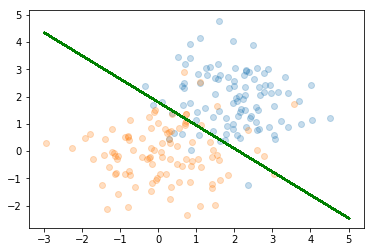

In [8]:
x1_axis = np.arange(-3, 5, step=0.0001)
x2_axis = (-weights[1] - x1_axis*weights[0][0])/weights[0][1]

plt.scatter(c1_np[:, 0], c1_np[:, 1], alpha=0.25)
plt.scatter(c2_np[:, 0], c2_np[:, 1], alpha=0.25)
plt.plot(x1_axis, x2_axis, marker = 'x', color='green', markersize=1)
plt.show()

## Part - 2
For this section, we will be evaluating the same method by adding zero-mean Gaussian noise with $\sigma^2=0.1$. The estimated and rounded covariance will be modifyed as follows.

In [12]:
noise = np.random.normal(loc=0, scale=np.sqrt(0.1), size=c1_c2_np.shape)

c1_c2_np_noisy = c1_c2_np + noise
c1_np_noisy = c1_np + noise[:100]
c2_np_noisy = c2_np + noise[100:]

mean_c1_noisy = np.mean(c1_np, axis=0)
mean_c2_noisy = np.mean(c2_np, axis=0)

print("Mean vector of class 0 is: {}".format(mean_c1_noisy))
print("Mean vector of class 1 is: {}".format(mean_c2_noisy))

cov_c1_noisy = np.cov(c1_np_noisy.T)
cov_c2_noisy = np.cov(c2_np_noisy.T)

print("Covariance matrix of class 0 is: \n{}".format(cov_c1))
print("Covariance matrix of class 1 is: \n{}".format(cov_c2))

est_cov_noisy = np.round((cov_c1_noisy+cov_c2_noisy)/2, decimals=2)

Mean vector of class 0 is: [1.9626492 1.9038787]
Mean vector of class 1 is: [ 0.12308503 -0.07268096]
Covariance matrix of class 0 is: 
[[ 0.93394097 -0.11066026]
 [-0.11066026  1.07921646]]
Covariance matrix of class 1 is: 
[[1.35117639 0.08811922]
 [0.08811922 1.0101348 ]]


Our estimated covariance matrix will be:

$$
\Sigma_{est-noisy} = \left(\begin{array}{cc} 
1.3 & -0.02\\
-0.02 & 1.09
\end{array}\right)
$$

In [10]:
noisy_scores_points_mu1 = discrimant_func(c1_c2_np_noisy, mean_c1_noisy, est_cov_noisy)
noisy_scores_points_mu2 = discrimant_func(c1_c2_np_noisy, mean_c2_noisy, est_cov_noisy)

preds_noisy = np.where(noisy_scores_points_mu1>noisy_scores_points_mu2, 1, 0)

evaluation(gt, preds_noisy)

weights_noisy = boundary_func(c1_c2_np_noisy, mean_c1_noisy, mean_c2_noisy, est_cov_noisy)[1]

Confusion Matrix:
 [[89 11]
 [11 89]]
Accuracy: 0.89
Recall: 0.89
Precision: 0.89


It can be said that the noise reduced our performance metrics around 1 - 2%. Even though we are using a linear classifier, we can say that our model is performing well against noise. 

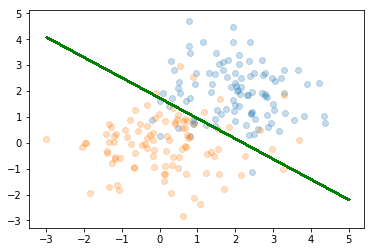

In [13]:
x1_axis = np.arange(-3, 5, step=0.0001)
x2_axis = (-weights_noisy[1] - x1_axis*weights_noisy[0][0])/weights_noisy[0][1]

plt.scatter(c1_np_noisy[:, 0], c1_np_noisy[:, 1], alpha=0.25)
plt.scatter(c2_np_noisy[:, 0], c2_np_noisy[:, 1], alpha=0.25)
plt.plot(x1_axis, x2_axis, marker = 'x', color='green', markersize=1)
plt.show()

You can find the link for running this iPython notebook here: https://github.com/canerozer/BLU603E-Final-Exam---Take-Home-Sections